In [28]:
#importing necessary libraries, just run this part

import numpy as np
import matplotlib.pyplot as plt
from peakBasedFunctions import voigtNUniPeak
from stackingFunctions import widthNormLinStacker
from edibles.utils.functions import vac2air_ciddor
import os.path
from edibles.utils.ContinuumFitter import ContinuumFitter

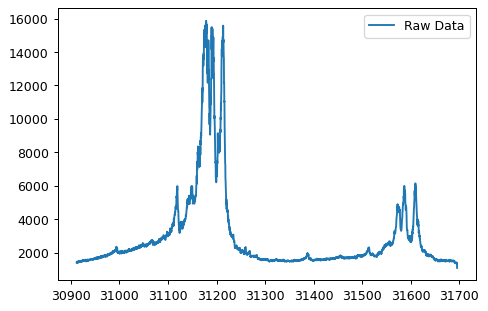

In [98]:
#loading raw data, change the file name for respective molecule and run this part

#put address for file
dataRaw = np.loadtxt('C:/Users/hkhan/edibles/edibles/data/Labdata/CRDS/PYRENE.DAT', skiprows = 1)
plt.plot(dataRaw[:, 0], dataRaw[:, 1], label = 'Raw Data')
plt.legend()

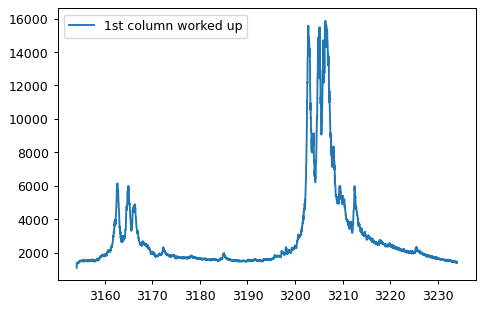

In [99]:
#workup of 1st column of data, change the option and run this part

#If in first column of file - wavelength is given in nm, set option = 0
#                           - wavelength is given in angstrom, set option = 1
#                           - wave number if given in 1/cm, set option = 2
option = 2

data = np.zeros(dataRaw.shape)

if option == 0:
    data[:, 0] = vac2air_ciddor(dataRaw[:, 0]*10.0)
elif option == 1:
    data[:, 0] = vac2air_ciddor(dataRaw[:, 0])
elif option == 2:
    data[:, 0] = vac2air_ciddor((1/dataRaw[:, 0])*1e8)
    
data[:, 1] = dataRaw[:, 1]
    
plt.plot(data[:, 0], data[:, 1], label = '1st column worked up')
plt.legend()

In [100]:
#run this part to select points to find continuum
#select points (in strict increasing wavelength order) by left clicking
#once done selecting, press centre mouse key to end selecting

CF1 = ContinuumFitter(data[:, 0], data[:, 1])
CS, contPoints  = CF1.SplineManualAnchor()

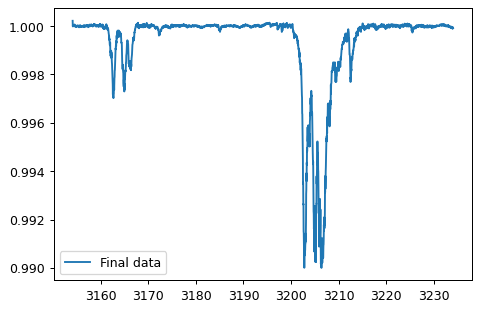

In [101]:
#workup of 2nd column of data, just run this part
#donot run it twice in sequence!!! (run from loading of raw data if you want to run this part again)

data[:, 1] = 1 - 0.01*(dataRaw[:, 1] - CS(data[:, 0]))/(np.max(dataRaw[:, 1]) - CS(data[dataRaw[:, 1] == np.max(dataRaw[:, 1]), 0]))
plt.plot(data[:, 0], data[:, 1], label = 'Final data')
plt.legend()

In [102]:
#run this part to select start and end points of peak (in strict increasing wavelength order)
#select only start and end points of peaks, nothing else
#make sure no. of points selected is two times no. of peaks

CF2 = ContinuumFitter(data[:, 0], data[:, 1])
wvs1 = CF2.SelectPoints(n=100, y_message = 'Select peak start and end points')[:, 0]
peakRanges = np.reshape(wvs1, (int(wvs1.size/2), 2))

In [103]:
#just run this part to check peak ranges

print(peakRanges)

[[3160.50508707 3163.53442271]
 [3163.95421678 3165.57370819]
 [3165.57370819 3167.67337866]
 [3171.75224967 3172.98203927]
 [3199.94522688 3204.26413492]
 [3204.26413492 3205.55380878]
 [3205.55380878 3208.91295887]
 [3208.91295887 3211.46231384]
 [3212.0319694  3214.73148633]]


In [104]:
#calculation of sd here, just run this part

sdArr = data

for it2 in range(peakRanges.shape[0]):
    #print(np.logical_and(sdArr[:, 0] >= peakRanges[it2, 0], sdArr[:, 0] <= peakRanges[it2, 1]).shape)
    sdArr = np.delete(sdArr, np.logical_and(sdArr[:, 0] >= peakRanges[it2, 0], sdArr[:, 0] <= peakRanges[it2, 1]), 0)

sd = np.std(sdArr[:, 1])
print(sd)

7.434453613601956e-05


{'Centre1': 3162.652730336277, 'FWHM1': 0.8089087630219283, 'ChiSq1': 458.19417721515, 'RedChiSq1': 4.628224012274242, 'Centre2': 3164.9326851994915, 'FWHM2': 0.8416131742039867, 'ChiSq2': 194.91878955518322, 'RedChiSq2': 3.7484382606766005, 'Centre3': 3166.1902133107387, 'FWHM3': 0.9401116429856454, 'ChiSq3': 214.37795175462873, 'RedChiSq3': 3.1526169375680695, 'Centre4': 3172.3629817456617, 'FWHM4': 0.5361565335993623, 'ChiSq4': 9.002036714620683, 'RedChiSq4': 0.23082145422104317, 'Centre5': 3203.000382667636, 'FWHM5': 1.3324847254424699, 'ChiSq5': 19845.26473048371, 'RedChiSq5': 139.7553854259416, 'Centre6': 3205.0464677230093, 'FWHM6': 1.0399103372825134, 'ChiSq6': 1860.0137272090726, 'RedChiSq6': 45.36618846851397, 'Centre7': 3206.491867804355, 'FWHM7': 2.337618486841765, 'ChiSq7': 9108.098971837835, 'RedChiSq7': 82.80089974398032, 'Centre8': 3209.5280984692754, 'FWHM8': 2.3021801021319335, 'ChiSq8': 306.81161525383584, 'RedChiSq8': 3.696525484985974, 'Centre9': 3212.67612942404, 

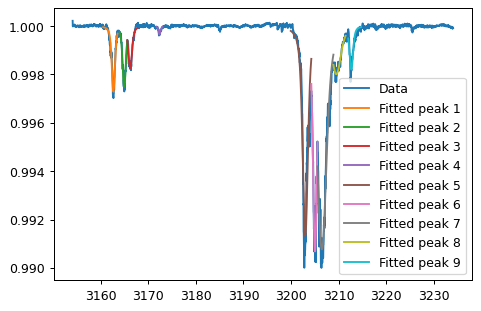

In [105]:
#fitting part, just run this part

plt.plot(data[:, 0], data[:, 1], label = 'Data')
rawParams = voigtNUniPeak(data, peakRanges, sd)
plt.legend()
print(rawParams)

In [106]:
#load raw parameters into array passable in stacker, change the file name according to molecule and run this part

params = np.zeros((peakRanges.shape[0], 2))

for it1 in range(peakRanges.shape[0]):
    lab1 = 'Centre' + str(it1+1)
    lab2 = 'FWHM' + str(it1+1)
    params[it1, 0] = rawParams[lab1]
    params[it1, 1] = rawParams[lab2]

print(params)

#change fileName here according to molecule
fileName = 'Lab Spectra Parameters/PyreneParams.txt'

if not os.path.exists(fileName):
    np.savetxt(fileName, params)

[[3.16265273e+03 8.08908763e-01]
 [3.16493269e+03 8.41613174e-01]
 [3.16619021e+03 9.40111643e-01]
 [3.17236298e+03 5.36156534e-01]
 [3.20300038e+03 1.33248473e+00]
 [3.20504647e+03 1.03991034e+00]
 [3.20649187e+03 2.33761849e+00]
 [3.20952810e+03 2.30218010e+00]
 [3.21267613e+03 9.03802019e-01]]


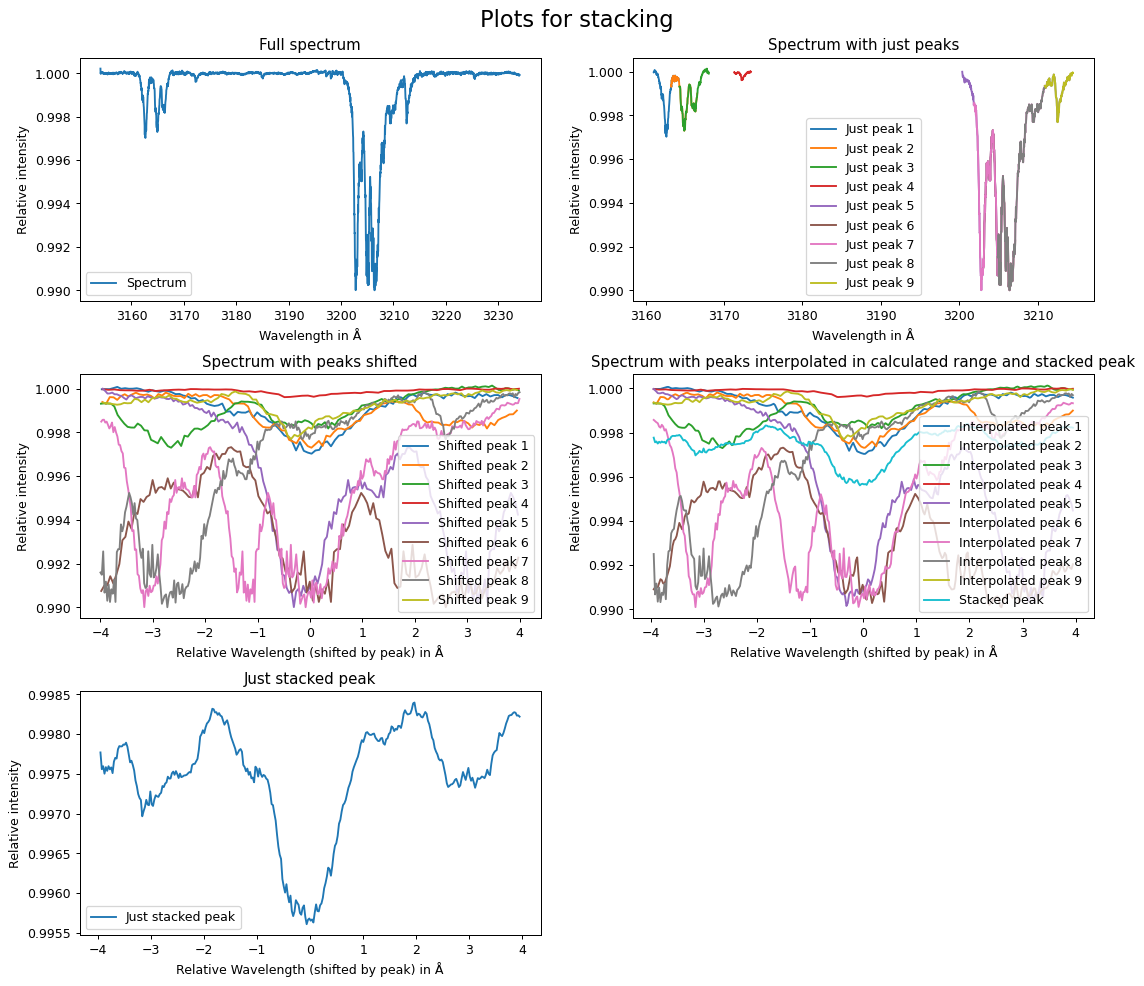

In [107]:
#stacking for checking, just run this part

stackedData = widthNormLinStacker(data, params)